In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [56]:
import pandas as pd
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [57]:
Chicken = pd.read_csv('Chicken.csv')
Chicken

,Count,MAX_T,AVG_H,MIN_H,RAIN,WIND,CLOUD,SUN_R,SNOW,DUST
0,253446,9.9,64,28,42.8,2.6,4.2,35.33,3.8,38
1,244160,7.5,56,27,2.1,2.7,3.2,44.50,2.7,66
2,569800,18.9,55,23,3.1,3.0,3.9,41.19,0.0,80
3,462780,23.5,56,26,30.7,2.9,5.0,39.61,0.0,77
4,431110,30.5,66,26,75.2,2.3,6.0,31.42,0.0,69
...,...,...,...,...,...,...,...,...,...,...
265,3361,11.5,55,21,4.7,2.6,3.2,67.33,5.0,40
266,1910,19.5,62,15,102.6,2.5,5.2,46.64,0.7,42
267,1335,28.7,55,17,20.4,2.7,4.1,62.35,0.0,45
268,5168,30.7,55,16,7.5,2.6,3.9,68.69,0.0,33


In [58]:
Chicken1 = Chicken.drop(['Count'], axis=1)
Chicken1

,MAX_T,AVG_H,MIN_H,RAIN,WIND,CLOUD,SUN_R,SNOW,DUST
0,9.9,64,28,42.8,2.6,4.2,35.33,3.8,38
1,7.5,56,27,2.1,2.7,3.2,44.50,2.7,66
2,18.9,55,23,3.1,3.0,3.9,41.19,0.0,80
3,23.5,56,26,30.7,2.9,5.0,39.61,0.0,77
4,30.5,66,26,75.2,2.3,6.0,31.42,0.0,69
...,...,...,...,...,...,...,...,...,...
265,11.5,55,21,4.7,2.6,3.2,67.33,5.0,40
266,19.5,62,15,102.6,2.5,5.2,46.64,0.7,42
267,28.7,55,17,20.4,2.7,4.1,62.35,0.0,45
268,30.7,55,16,7.5,2.6,3.9,68.69,0.0,33


In [59]:
Chicken2 = Chicken.drop(['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'],axis=1)
Chicken2

,Count
0,253446
1,244160
2,569800
3,462780
4,431110
...,...
265,3361
266,1910
267,1335
268,5168


In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
scaler = StandardScaler()
Chicken3 = scaler.fit_transform(Chicken1)
Chicken3 = pd.DataFrame(Chicken3,columns=['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'])

In [62]:
Chicken_result = pd.concat([Chicken2,Chicken3],axis = 1)
print(Chicken_result)

      Count     MAX_T     AVG_H     MIN_H      RAIN      WIND     CLOUD  \
0    253446 -1.590283  0.374830  1.041634 -0.438934  0.607836 -0.466332   
1    244160 -1.859682 -0.582183  0.920095 -0.685089  0.845685 -1.204804   
2    569800 -0.580038 -0.701810  0.433939 -0.679041  1.559232 -0.687874   
3    462780 -0.063691 -0.582183  0.798556 -0.512115  1.321383  0.124446   
4    431110  0.722055  0.614084  0.798556 -0.242977 -0.105711  0.862919   
..      ...       ...       ...       ...       ...       ...       ...   
265    3361 -1.410684 -0.701810  0.190861 -0.669364  0.607836 -1.204804   
266    1910 -0.512689  0.135577 -0.538373 -0.077260  0.369987  0.272141   
267    1335  0.520006 -0.701810 -0.295295 -0.574410  0.845685 -0.540179   
268    5168  0.744505 -0.701810 -0.416834 -0.652430  0.607836 -0.687874   
269    1500  0.969003  1.451471 -0.173756  1.683931  0.369987  1.527544   

        SUN_R      SNOW      DUST  
0   -0.929041  0.619663 -0.732827  
1   -0.300279  0.317314  0.

In [63]:
Cow = pd.read_csv('COWCOW.csv')
Cow

,Count,MAX_T,AVG_H,MIN_H,RAIN,WIND,CLOUD,SUN_R,SNOW,Dust
0,2,10.3,52,14,11.6,2.6,2.9,62.23,4.2,73
1,0,9.9,56,11,5.2,2.2,2.2,66.18,0.8,90
2,1,17.1,64,12,60.6,2.8,5.4,41.37,0.5,86
3,0,25.2,54,12,44.4,3.1,3.8,60.79,0.0,98
4,0,29.0,58,10,60.6,2.7,4.7,51.28,0.0,80
...,...,...,...,...,...,...,...,...,...,...
325,211,11.5,55,21,4.7,2.6,3.2,67.33,5.0,40
326,342,19.5,62,15,102.6,2.5,5.2,46.64,0.7,42
327,328,28.7,55,17,20.4,2.7,4.1,62.35,0.0,45
328,240,30.7,55,16,7.5,2.6,3.9,68.69,0.0,33


In [64]:
Pig= pd.read_csv('PIGPIG.csv')
Pig

,Count,MAX_T,AVG_H,MIN_H,RAIN,WIND,CLOUD,SUN_R,SNOW,DUST
0,47,29.6,71,21,70.7,2.0,6.2,45.93,0.0,77
1,12,33.6,81,36,436.1,2.5,7.6,32.69,0.0,65
2,0,33.7,85,38,786.6,2.4,7.4,32.57,0.0,63
3,0,28.4,68,24,47.2,1.6,4.9,52.18,0.0,55
4,0,25.6,61,16,39.3,1.7,4.1,61.96,0.0,78
...,...,...,...,...,...,...,...,...,...,...
320,2434,11.5,55,21,4.7,2.6,3.2,67.33,5.0,40
321,2289,19.5,62,15,102.6,2.5,5.2,46.64,0.7,42
322,5912,28.7,55,17,20.4,2.7,4.1,62.35,0.0,45
323,819,30.7,55,16,7.5,2.6,3.9,68.69,0.0,33


In [65]:
feature_columns = list(Chicken_result.columns.difference(['Count'])) # price-target, 그 외 feature
X = Chicken_result[feature_columns]
y = Chicken_result['Count']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(189, 9) (81, 9) (189,) (81,)


In [66]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 369
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 9
[LightGBM] [Info] Start training from score 127594.402116
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [27]:
# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

In [28]:
import skimage
skimage.__version__

'0.19.2'

In [29]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [30]:
shap.force_plot(explainer.expected_value, shap_values, test_x) 


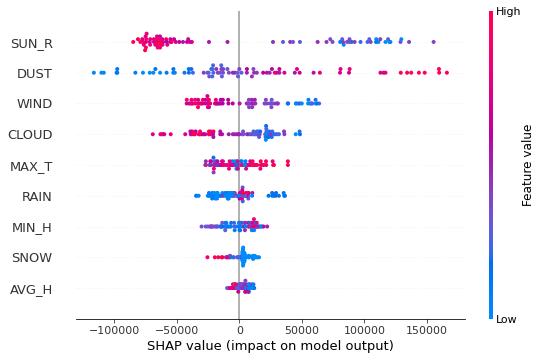

In [31]:
shap.summary_plot(shap_values, test_x)

In [51]:
Cow1 = Cow.drop(['Count'], axis=1)
Cow2 = Cow.drop(['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','Dust'],axis=1)

In [52]:
Cow3 = scaler.fit_transform(Cow1)
Cow3 = pd.DataFrame(Cow3,columns=['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'])

In [53]:
Cow_result = pd.concat([Cow2,Cow3],axis = 1)
print(Cow_result)

     Count     MAX_T     AVG_H     MIN_H      RAIN      WIND     CLOUD  \
0        2 -1.406002 -0.962421  0.668975 -0.858324  1.561642 -1.025226   
1        0 -1.381884 -0.061333  0.583076 -0.584140  0.992832 -0.383592   
2        1 -0.863349  0.562498  0.840774 -0.056738  1.940849  0.395535   
3        0 -0.127752 -0.338591  0.153578 -0.726877  3.078469 -0.154437   
4        0  0.475196  0.146611  0.411277 -0.801068  1.182435  0.258042   
..     ...       ...       ...       ...       ...       ...       ...   
325    211 -1.381884 -1.655566 -0.877216 -0.857517 -0.144788 -0.887733   
326    342 -0.380990 -0.199962 -0.963116 -0.023675 -0.523995  0.166380   
327    328  0.680199 -0.615849 -0.705417 -0.676878 -0.144788 -0.337761   
328    240  1.126380 -0.685163 -0.705417 -0.873646 -0.334391 -0.062775   
329    155  1.259029  1.047699 -0.361819  1.058547 -0.903201  0.945507   

        SUN_R      SNOW      DUST  
0    1.518966 -0.303955  0.940032  
1    0.332448  0.478960  1.821166  
2  

In [54]:
feature_columns = list(Cow_result.columns.difference(['Count'])) # price-target, 그 외 feature
X = Cow_result[feature_columns]
y = Cow_result['Count']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(231, 9) (99, 9) (231,) (99,)


In [55]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 449
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 9
[LightGBM] [Info] Start training from score 471.606061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [56]:
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

In [57]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [58]:
shap.force_plot(explainer.expected_value, shap_values, test_x) 


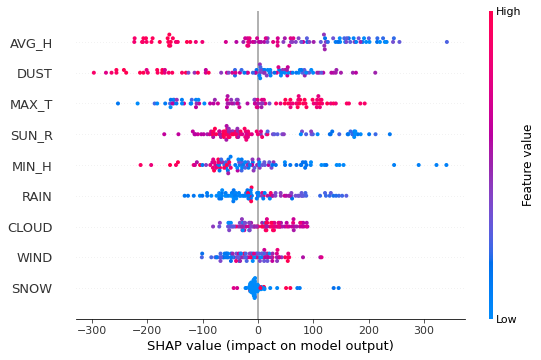

In [59]:
shap.summary_plot(shap_values, test_x)

In [67]:
Pig1 = Pig.drop(['Count'], axis=1)
Pig2 = Pig.drop(['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'],axis=1)
Pig3 = scaler.fit_transform(Pig1)
Pig3 = pd.DataFrame(Pig3,columns=['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'])
Pig_result = pd.concat([Pig2,Pig3],axis = 1)
print(Pig_result)


     Count     MAX_T     AVG_H     MIN_H      RAIN      WIND     CLOUD  \
0       47  0.621324  1.133769  0.148490 -0.282644 -0.730326  1.005718   
1       12  1.071634  2.315156  1.958208  1.797151  0.436616  2.020581   
2        0  1.082891  2.787711  2.199504  3.792139  0.203227  1.875601   
3        0  0.486231  0.779352  0.510433 -0.416402 -1.663880  0.063345   
4        0  0.171014 -0.047619 -0.454750 -0.461368 -1.430491 -0.516577   
..     ...       ...       ...       ...       ...       ...       ...   
320   2434 -1.416329 -0.756452  0.148490 -0.658305  0.670004 -1.168989   
321   2289 -0.515709  0.070520 -0.575398 -0.101075  0.436616  0.280816   
322   5912  0.520004 -0.756452 -0.334102 -0.568943  0.903393 -0.516577   
323    819  0.745159 -0.756452 -0.454750 -0.642368  0.670004 -0.661557   
324     39  0.970314  1.370046 -0.213454  1.556387  0.436616  1.513150   

        SUN_R      SNOW      DUST  
0   -0.222139 -0.420968  1.187701  
1   -1.167087 -0.420968  0.557235  
2  

In [68]:
feature_columns = list(Pig_result.columns.difference(['Count'])) # price-target, 그 외 feature
X = Pig_result[feature_columns]
y = Pig_result['Count']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인


(227, 9) (98, 9) (227,) (98,)


In [69]:
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE


Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 227, number of used features: 9
[LightGBM] [Info] Start training from score 1159.960352
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RMSE: 2502.170403076428


In [70]:
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [71]:
shap.force_plot(explainer.expected_value, shap_values, test_x) 

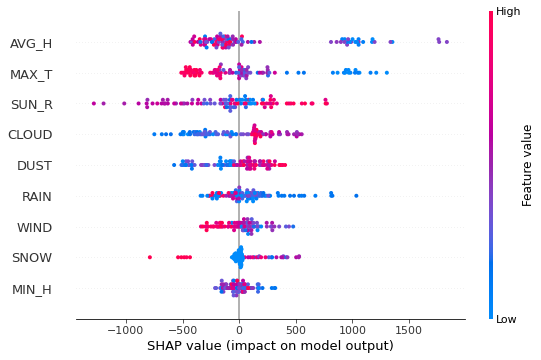

In [72]:
shap.summary_plot(shap_values, test_x)

In [84]:
Cow_dead = pd.read_csv('Cow_dead_integrated.csv')
Cow_dead

,Count,MAX_T,AVG_H,MIN_H,RAIN,WIND,CLOUD,SUN_R,SNOW,Dust
0,8764,9.0,56,22,11.3,2.6,3.9,62.94,5.1,49
1,7419,13.0,59,17,22.7,2.9,4.5,59.50,0.3,84
2,8167,21.9,45,9,9.6,3.1,2.8,73.07,0.0,71
3,8025,28.3,55,11,80.5,3.1,5.0,54.71,0.0,45
4,7370,32.2,53,12,28.9,3.0,4.1,66.03,0.0,45
...,...,...,...,...,...,...,...,...,...,...
85,8990,11.5,55,21,4.7,2.6,3.2,67.33,5.0,40
86,11623,19.5,62,15,102.6,2.5,5.2,46.64,0.7,42
87,9044,28.7,55,17,20.4,2.7,4.1,62.35,0.0,45
88,8475,30.7,55,16,7.5,2.6,3.9,68.69,0.0,33


In [85]:
Cow_dead1 = Cow_dead.drop(['Count'], axis=1)
Cow_dead1

,MAX_T,AVG_H,MIN_H,RAIN,WIND,CLOUD,SUN_R,SNOW,Dust
0,9.0,56,22,11.3,2.6,3.9,62.94,5.1,49
1,13.0,59,17,22.7,2.9,4.5,59.50,0.3,84
2,21.9,45,9,9.6,3.1,2.8,73.07,0.0,71
3,28.3,55,11,80.5,3.1,5.0,54.71,0.0,45
4,32.2,53,12,28.9,3.0,4.1,66.03,0.0,45
...,...,...,...,...,...,...,...,...,...
85,11.5,55,21,4.7,2.6,3.2,67.33,5.0,40
86,19.5,62,15,102.6,2.5,5.2,46.64,0.7,42
87,28.7,55,17,20.4,2.7,4.1,62.35,0.0,45
88,30.7,55,16,7.5,2.6,3.9,68.69,0.0,33


In [86]:
Cow_dead2 = Cow_dead.drop(['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','Dust'],axis=1)
Cow_dead2

,Count
0,8764
1,7419
2,8167
3,8025
4,7370
...,...
85,8990
86,11623
87,9044
88,8475


In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
Cow_dead3 = scaler.fit_transform(Cow_dead1)
Cow_dead3 = pd.DataFrame(Cow_dead3,columns=['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','Dust'])

In [89]:
Cow_dead_result = pd.concat([Cow_dead2,Cow_dead3],axis = 1)
print(Cow_dead_result)

    Count     MAX_T     AVG_H     MIN_H      RAIN      WIND     CLOUD  \
0    8764 -1.748496 -0.476273  0.299232 -0.721970  1.019263 -0.734751   
1    7419 -1.303397 -0.118073 -0.324168 -0.623826  1.858290 -0.237551   
2    8167 -0.313053 -1.789671 -1.321609 -0.736605  2.417642 -1.646283   
3    8025  0.399105 -0.595673 -1.072248 -0.126219  2.417642  0.176782   
4    7370  0.833076 -0.834472 -0.947568 -0.570449  2.137966 -0.569017   
..    ...       ...       ...       ...       ...       ...       ...   
85   8990 -1.470309 -0.595673  0.174552 -0.778790  1.019263 -1.314817   
86  11623 -0.580112  0.240126 -0.573528  0.064042  0.739587  0.342515   
87   9044  0.443615 -0.595673 -0.324168 -0.643627  1.298939 -0.569017   
88   8475  0.666164 -0.595673 -0.448848 -0.754684  1.019263 -0.734751   
89   8276  0.888714  1.553525 -0.199488  2.571016  0.739587  1.751248   

       SUN_R      SNOW      Dust  
0   0.560222  2.087012  0.545945  
1   0.265999 -0.350374  3.105064  
2   1.426642 -0.50

In [90]:
feature_columns = list(Cow_dead_result.columns.difference(['Count'])) # price-target, 그 외 feature
X = Cow_dead_result[feature_columns]
y = Cow_dead_result['Count']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(63, 9) (27, 9) (63,) (27,)


In [91]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 154
[LightGBM] [Info] Number of data points in the train set: 63, number of used features: 8
[LightGBM] [Info] Start training from score 8161.555556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

RMSE: 1288.4589257454684


In [15]:
# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

In [16]:
import skimage
skimage.__version__

'0.19.2'

In [17]:
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])

In [18]:
shap.force_plot(explainer.expected_value, shap_values, test_x) 


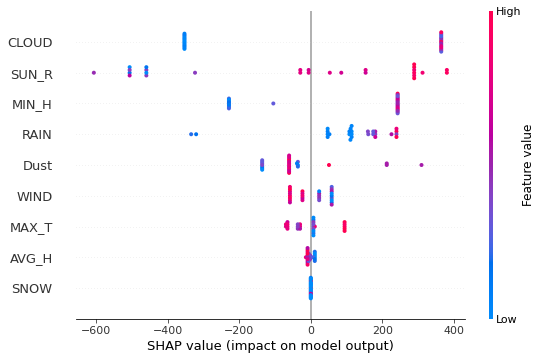

In [19]:
shap.summary_plot(shap_values, test_x)

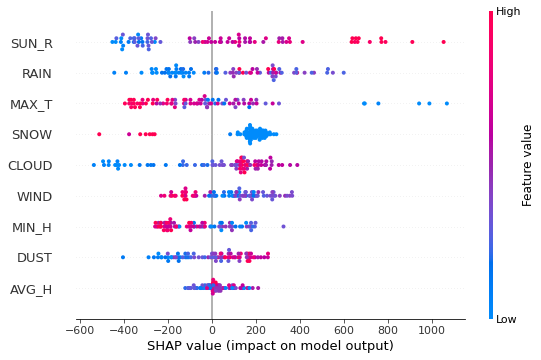

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 9
[LightGBM] [Info] Start training from score 20.682540
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [111]:
Chicken = pd.read_csv('Pig_Jeju.csv')
Chicken1 = Chicken.drop(['Count'], axis=1)
Chicken2 = Chicken.drop(['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'],axis=1)
scaler = StandardScaler()
Chicken3 = scaler.fit_transform(Chicken1)
Chicken3 = pd.DataFrame(Chicken3,columns=['MAX_T','AVG_H','MIN_H','RAIN','WIND','CLOUD','SUN_R','SNOW','DUST'])
Chicken_result = pd.concat([Chicken2,Chicken3],axis = 1)
feature_columns = list(Chicken_result.columns.difference(['Count'])) # price-target, 그 외 feature
X = Chicken_result[feature_columns]
y = Chicken_result['Count']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산
shap.initjs() # javascript 초기화 (graph 초기화)
shap.force_plot(explainer.expected_value, shap_values[1,:], test_x.iloc[1,:])
shap.summary_plot(shap_values, test_x)
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

In [96]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

Found `n_estimators` in params. Will use it instead of argument


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 374
[LightGBM] [Info] Number of data points in the train set: 189, number of used features: 9
[LightGBM] [Info] Start training from score 24681.216931
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f